# K-Means Clustering

In [66]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from itertools import product
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [67]:
# Define possible dataset paths.
paths = [
    '../datasets/_integrated_data/dropped-column-if-missing-value/data.csv',                            # 0   - Annual  : Dropped column if missing value
    '../datasets/_integrated_data/dropped-column-if-missing-value/data-gendered.csv',                   # 1   - Annual  : Dropped column if missing value         - Gendered
    '../datasets/_integrated_data/dropped-row-if-missing-value/data.csv',                               # 2   - Annual  : Dropped row if missing value
    '../datasets/_integrated_data/dropped-row-if-missing-value/data-gendered.csv',                      # 3   - Annual  : Dropped row if missing value            - Gendered
    '../datasets/_integrated_data/missing-pollutant-values-as-NA/data.csv',                             # X4  - Annual  : Missing pollutant values as NA
    '../datasets/_integrated_data/missing-pollutant-values-as-NA/data-gendered.csv',                    # X5  - Annual  : Missing pollutant values as NA          - Gendered
    '../datasets/_integrated_data/missing-pollutant-values-as-NaN/data.csv',                            # X6  - Annual  : Missing pollutant values as NaN
    '../datasets/_integrated_data/missing-pollutant-values-as-NaN/data-gendered.csv',                   # X7  - Annual  : Missing pollutant values as NaN         - Gendered
    '../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data.csv',                    # 8   - Annual  : Missing pollutant values filled somehow
    '../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data-gendered.csv',           # 9   - Annual  : Missing pollutant values filled somehow - Gendered
    '../datasets/_integrated_data/monthly/dropped-column-if-missing-value/data.csv',                    # 10  - Monthly : Dropped column if missing value
    '../datasets/_integrated_data/monthly/dropped-column-if-missing-value/data-gendered.csv',           # 11  - Monthly : Dropped column if missing value         - Gendered
    '../datasets/_integrated_data/monthly/dropped-row-if-missing-value/data.csv',                       # 12  - Monthly : Dropped row if missing value
    '../datasets/_integrated_data/monthly/dropped-row-if-missing-value/data-gendered.csv',              # 13  - Monthly : Dropped row if missing value            - Gendered
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NA/data.csv',                     # X14 - Monthly : Missing pollutant values as NA
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NA/data-gendered.csv',            # X15 - Monthly : Missing pollutant values as NA          - Gendered
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NaN/data.csv',                    # X16 - Monthly : Missing pollutant values as NaN
    '../datasets/_integrated_data/monthly/missing-pollutant-values-as-NaN/data-gendered.csv',           # X17 - Monthly : Missing pollutant values as NaN         - Gendered
    '../datasets/_integrated_data/monthly/missing-pollutant-values-filled-somehow/data.csv',            # 18  - Monthly : Missing pollutant values filled somehow
    '../datasets/_integrated_data/monthly/missing-pollutant-values-filled-somehow/data-gendered.csv'    # 19  - Monthly : Missing pollutant values filled somehow - Gendered
]

# Choose a dataset.
chosen_dataset = 9

# Load the data
df = pd.read_csv(paths[chosen_dataset])

# Count of number of pollutant features in the dataset
column_list = ['CO ppm', 'NO pphm', 'NO2 pphm', 'OZONE pphm', 'PM10 µg/m³', 'SO2 pphm']
n_pollutants = sum([1 for col in df.columns if col in column_list])

# Extract pollutant columns and columns after the pollutants
pollutant_columns = [col for col in df.columns if col in column_list]
health_stat_columns = df.columns[df.columns.get_loc(pollutant_columns[-1]) + 1:].tolist()

# Standardize the pollutant columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[pollutant_columns + health_stat_columns])

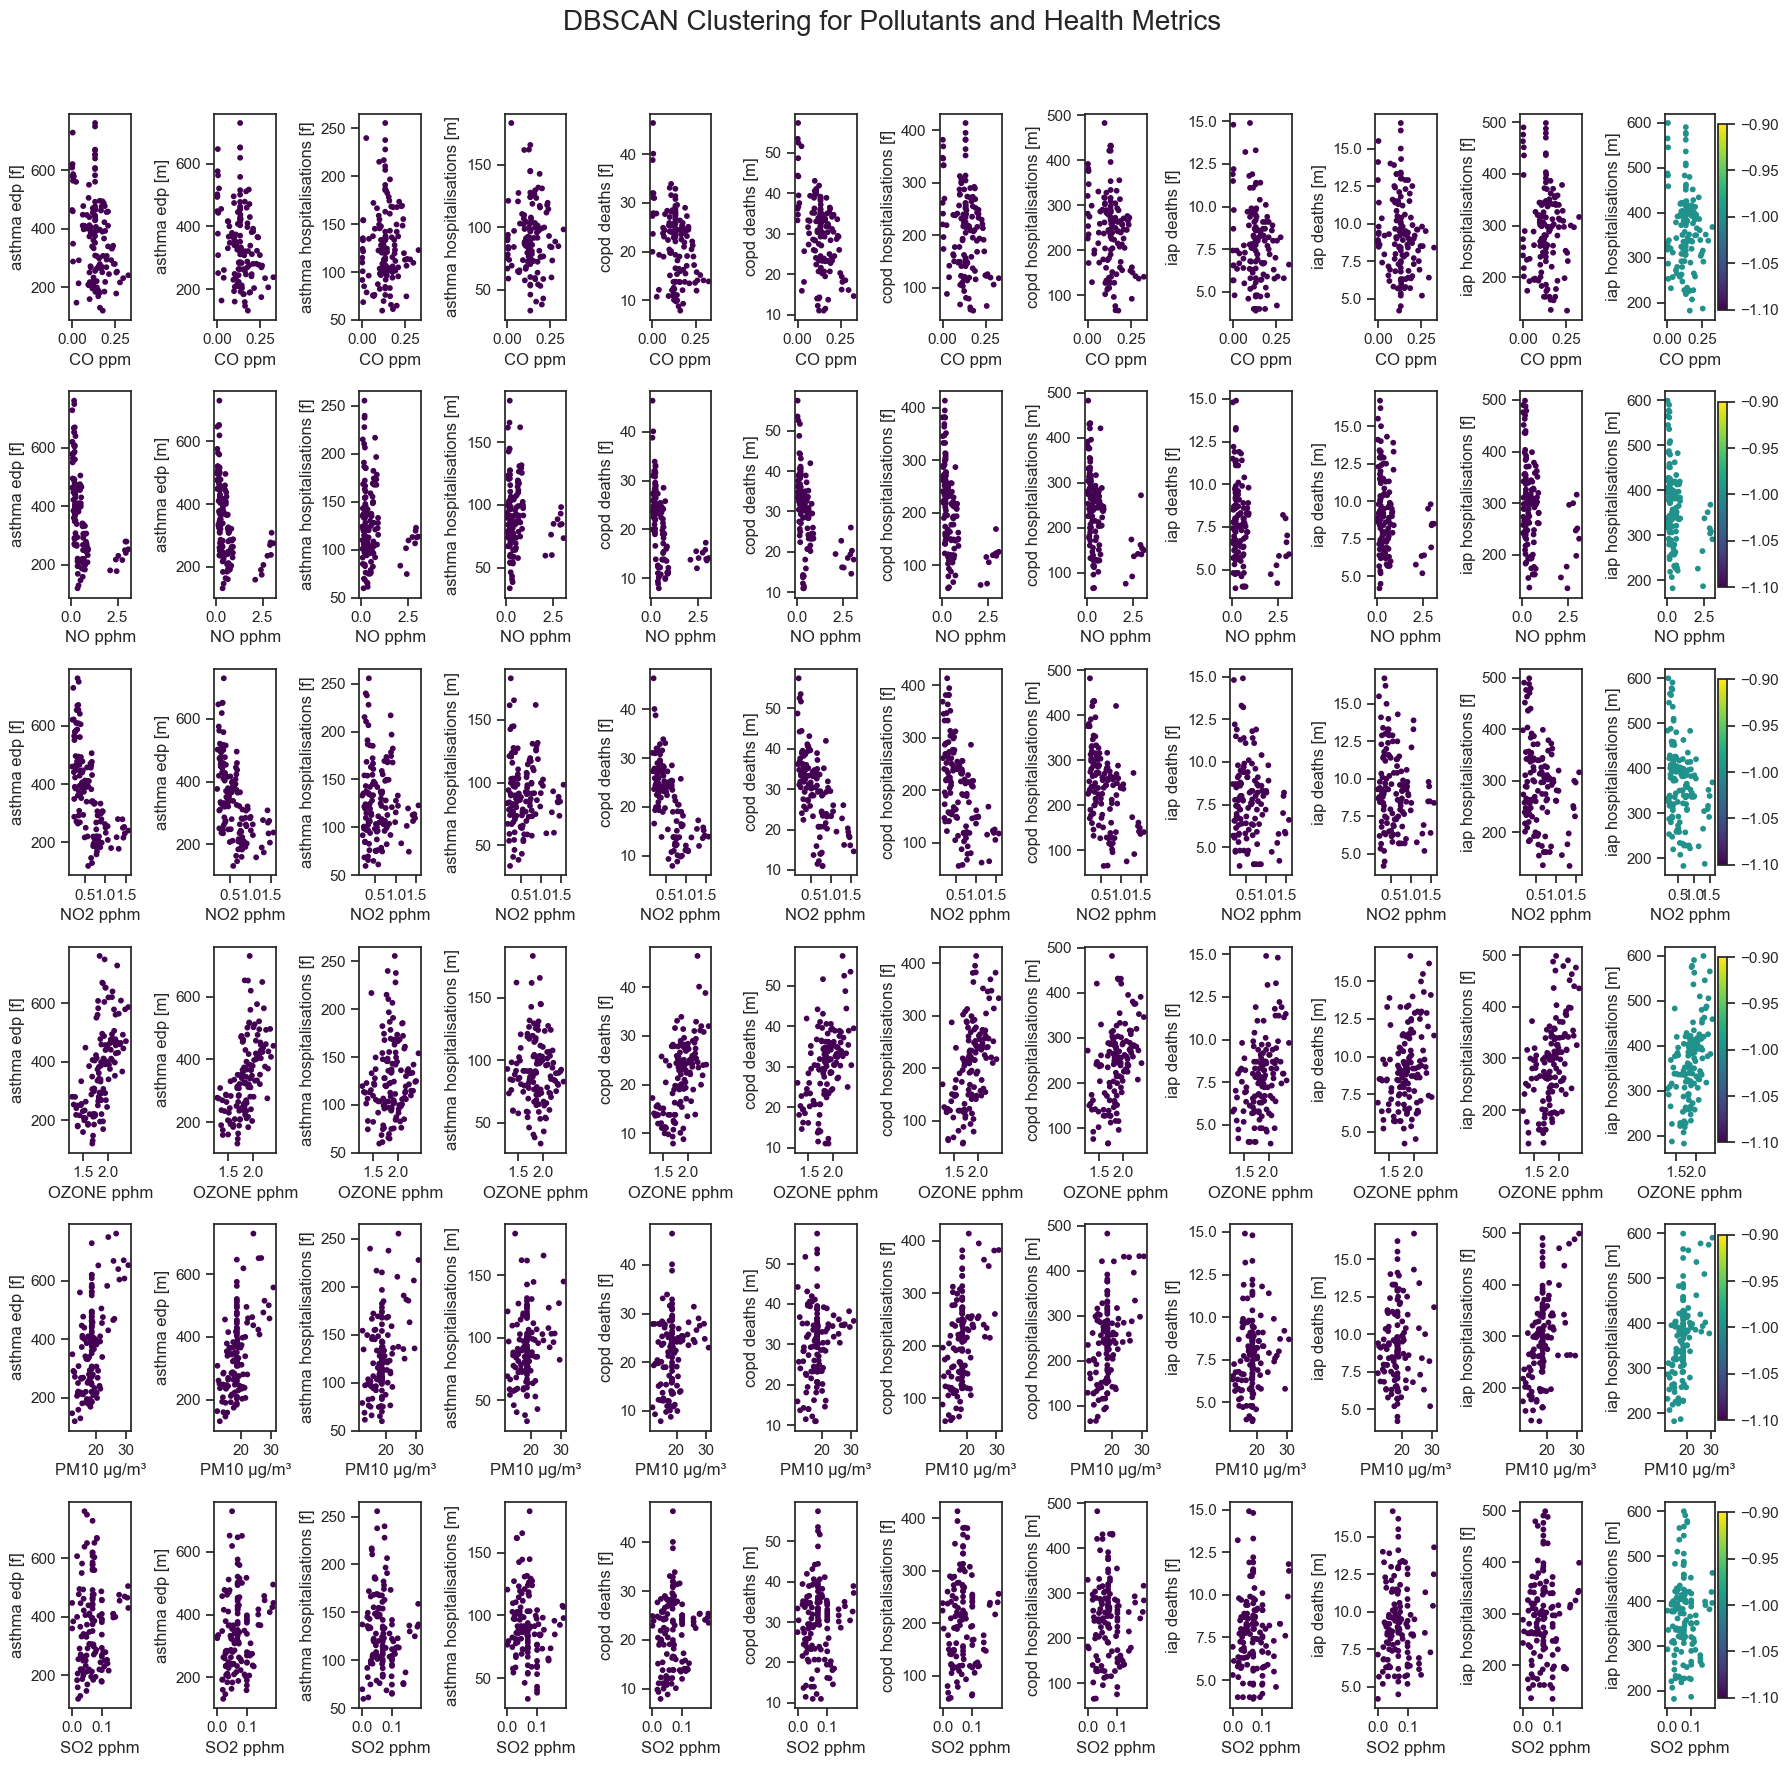

In [68]:
# Apply DBSCAN to the full dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)
df['cluster'] = clusters

# Set up a grid for plotting
sns.set(style="ticks")
num_pollutants = len(pollutant_columns)
num_health_metrics = len(health_stat_columns)
fig, axes = plt.subplots(num_pollutants, num_health_metrics, figsize=(18, 18))
fig.suptitle('DBSCAN Clustering for Pollutants and Health Metrics', fontsize=20)

# Iterate through each combination of pollutant and health metric
for i, (pollutant, health) in enumerate(product(pollutant_columns, health_stat_columns)):
    row = i // num_health_metrics
    col = i % num_health_metrics
    
    ax = axes[row, col]
    scatter = ax.scatter(df[pollutant], df[health], c=df['cluster'], cmap='viridis', s=10)
    ax.set_xlabel(pollutant)
    ax.set_ylabel(health)
    
    if col == num_health_metrics - 1:  # Add color bar to the last column
        fig.colorbar(scatter, ax=ax, orientation='vertical')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Unique clusters found: [-1]


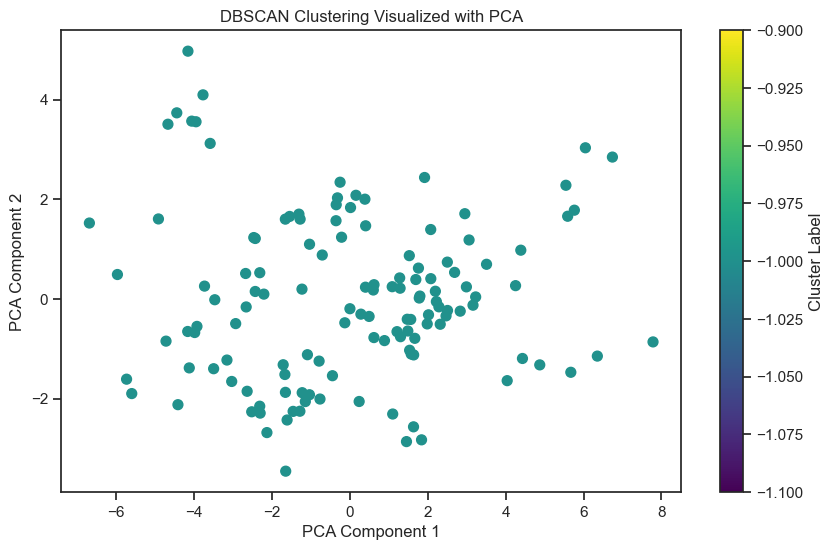

In [71]:
# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Apply DBSCAN again (already fitted, but doing it explicitly for PCA plot)
dbscan = DBSCAN(eps=.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)
df['cluster'] = clusters

# Get unique clusters
unique_clusters = np.unique(clusters)
print(f"Unique clusters found: {unique_clusters}")

# Plot the PCA results with DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


Unique clusters found: [-1]


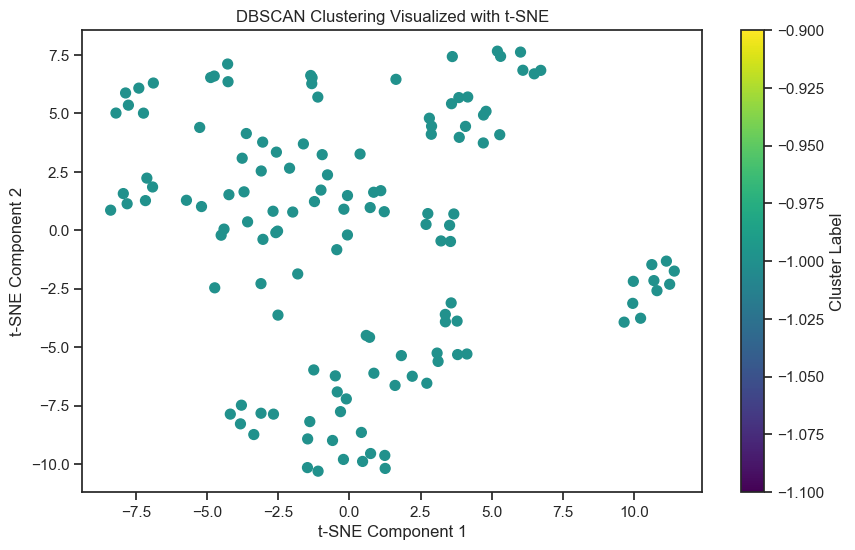

In [70]:
# Apply t-SNE to reduce to 2D for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(scaled_features)

# Apply DBSCAN again (already fitted, but doing it explicitly for t-SNE plot)
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)
df['cluster'] = clusters

# Get unique clusters
unique_clusters = np.unique(clusters)
print(f"Unique clusters found: {unique_clusters}")

# Plot the t-SNE results with DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
